In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects/scripts/hemato_figures"

In [2]:
setwd("../..")

In [3]:
library(devtools)
library(metacell)
#library(dendextend)
#library(DESeq2)
#library(RColorBrewer)
#library(GEOquery)

source("../tuft/scripts/metacell_functions.r")
scdb_init("saved_work", force=T)
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")

Warning message:
“package ‘devtools’ was built under R version 4.2.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.2.3”
Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: plotrix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotrix’”
initializing scdb to saved_work

ℹ SHA-1 hash of file is "9adfcccbce4f308dad9fb0d084241583dbbeb5b8"
Loading required package: glmnet

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Loaded glmnet 4.1-8



In [4]:
dir.create("figures")
outdir = "figures/figure1"
dir.create(outdir)

Warning message in dir.create("figures"):
“'figures' already exists”
Warning message in dir.create(outdir):
“'figures/figure1' already exists”


In [5]:
id = "hemato_liver"

id_s = paste0(id, "_annotated")
#message("Loaded a UMI matrix of ", sc_mat@ncells, " cells and ", sc_mat@ngenes, " genes.")

message("Loading singlets dataset:")
sin_2d = scdb_mc2d(id); sin_cl = scdb_mc(id_s); sin_mat = scdb_mat(id)
lfp = log2(sin_cl@mc_fp)
message("Loaded a metacell object of ", length(sin_cl@mc), " singlets. Total of ", length(table(sin_cl@mc)), " metacells.")


Loading singlets dataset:

Loaded a metacell object of 14629 singlets. Total of 268 metacells.



In [6]:
message("mc contains the assignment of cell to metacell")
head(sin_cl@mc)

message("colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state")
head(sin_cl@colors)

message("color_key maps each color to its annotation")
head(sin_cl@color_key)

message("It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color")
color_scheme = sin_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group

message("Now we can assign each cell with its annotation")
sin_names = color2name[ sin_cl@colors[ sin_cl@mc]]; names(sin_names) = names(sin_cl@mc)

as.matrix(table(sin_names))


mc contains the assignment of cell to metacell



AB1007_AAGCCTT AB1007_AAGGCTA AB1007_ACACGTG AB1007_ACAGCTC AB1007_ACATCCG 
            52             62             60             39             58 
AB1007_ACATGCT 
           114

colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state



[1] "#056863" "#034F25" "#034F25" "#056863" "#056863" "#056863"

color_key maps each color to its annotation



,group,color
,<chr>,<chr>
preB,preB,#CDA3FF
pDC,pDC,#9EDAFF
T cells,T cells,#00BBDA
NK,NK,#0087DA
Myeloid cells,Myeloid cells,#8CA3B2
Monocytes,Monocytes,#69D29F


It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color

Now we can assign each cell with its annotation



Basophils,74
Dendritic cells,314
Elane+ Ms4a3+ immature neutrophils,712
Endothelial cells,1963
Erythrocytes,590
Erythroid cells,1275
Erythroid progenitors,2931
Fcnb+ neutrophils,383
Hepatic stellate cells,81
Kupffer cells,74
Liver epithelial cells,223


In [7]:
message("In addition, metadata per cell can be extracted from the mat object")
sin_stats = sin_mat@cell_metadata[names(sin_cl@mc),]
sin_stats[ sample(rownames(sin_stats), 5),]

In addition, metadata per cell can be extracted from the mat object



,plate,cell,barcode,umicount,mt_frac,Seq.Batch.ID,Date.of.sequencing,Batch.Set.ID,Owner,Date.of.sort,⋯,FACS.machine,Wells,condition,Tissue,Age,Cell_type,Replicate,Analysis,Include,amp_batch_id
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
AB974_GTCGAGA,AB974,AB974_GTCGAGA,GTCGAGA,6320,0.08829114,SB013,15/02/2024,Maiia-FL-E16.5,Maiia,29/11/2023,⋯,S6,ALL,,Liver,E16.5,CD150,4,,Models,1
AB754_CATGAAC,AB754,AB754_CATGAAC,CATGAAC,599,0.11352254,SB011,04/09/2023,Maiia-FL-P5,Maiia,02/08/23,⋯,BD Aria III,ALL,,Liver,P5,CD45+,1,Neutrophils,Models,1
AB974_GTCCATA,AB974,AB974_GTCCATA,GTCCATA,8865,0.07422448,SB013,15/02/2024,Maiia-FL-E16.5,Maiia,29/11/2023,⋯,S6,ALL,,Liver,E16.5,CD150,4,,Models,1
AB464_GGAATCG,AB464,AB464_GGAATCG,GGAATCG,1085,0.05253456,SB008,14/03/2023,Maiia-FL-E16.5,Maiia,11/09/2022,⋯,BD Aria III,ALL,mouse 1,Liver,E16.5,CD45-,1,,Models,1
AB467_GTCAGTG,AB467,AB467_GTCAGTG,GTCAGTG,4787,0.14226029,SB008,14/03/2023,Maiia-FL-P0,Maiia,10/11/2022,⋯,BD Aria III,ALL,mouse 2,Liver,P0,CD150,1,,Models,1


In [8]:
df = data.frame(mc = sin_cl@mc, cell_type = sin_names[ names(sin_cl@mc)])
write.table(df, sep = "\t", quote = F, col.names = NA, file = paste0(outdir, "/liver_metacells.txt"))

In [9]:
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

[1] "preB"                                 
 [2] "pDC"                                  
 [3] "T cells"                              
 [4] "NK"                                   
 [5] "Myeloid cells"                        
 [6] "Monocytes"                            
 [7] "Kupffer cells"                        
 [8] "Dendritic cells"                      
 [9] "Elane+ Ms4a3+ immature neutrophils"   
[10] "Fcnb+ neutrophils"                    
[11] "Mmp8 low Retnlg low Fcnb+ neutrophils"
[12] "Retnlg+ mmp8+ neutrophils"            
[13] "Basophils"                            
[14] "Erythroid progenitors"                
[15] "Erythroid cells"                      
[16] "Erythrocytes"                         
[17] "Megakaryocytes"                       
[18] "Platelets"                            
[19] "Endothelial cells"                    
[20] "Mesothelial cells"                    
[21] "Mfap5+ fibroblasts"                   
[22] "Hepatic stellate cells"               
[23] "Liver epithelial cells"               
[24] "Mix"

zlim: -9.20167133399361<>9.20167133399361



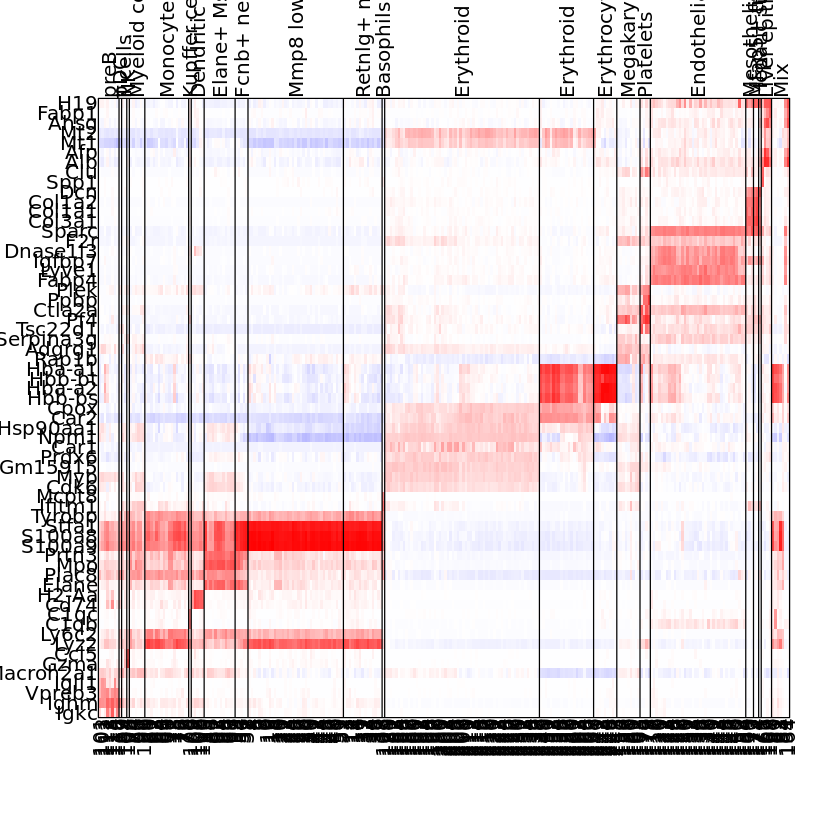

In [10]:
mc2lin = factor(color2name[ sin_cl@colors], levels = lin_ord); 
names(mc2lin) = seq_along(mc2lin)
mc_ord = order(mc2lin)

lfp = log2(sin_cl@mc_fp)
nms = choose_genes_from_clust(mc_id = id_s,      # the unique id of the mc object
                              mat_id = id_s,     # the unique id of the mat object
                              nms_per_clust = 2, # number of differential genes per metacell
                              nms_thresh = 2)  # minimum threshold for gene enrichment

IM = lfp[ nms, mc_ord]
IM = IM[ order(max.col(IM)),]

image.2(IM, balance=T, vct = mc2lin[ colnames(IM)])
box()

In [11]:
table(sin_names)
bad_pops = "Mix"
good_pops = setdiff(lin_ord, bad_pops)
good_cells = names(sin_names)[ sin_names %in% good_pops]

sin_names
                            Basophils                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Endothelial cells 
                                  712                                  1963 
                         Erythrocytes                       Erythroid cells 
                                  590                                  1275 
                Erythroid progenitors                     Fcnb+ neutrophils 
                                 2931                                   383 
               Hepatic stellate cells                         Kupffer cells 
                                   81                                    74 
               Liver epithelial cells                        Megakaryocytes 
                                  223                                   522 
                    Mesothelial cells                    Mfap5+ fi

In [12]:
pdf(paste0(outdir, "/Fig1C.pdf"), useDingbats = F)
plot.2(sin_2d@sc_x[ good_cells], sin_2d@sc_y[ good_cells], col = sin_cl@colors[ sin_cl@mc[ good_cells]])
dev.off()

pdf(paste0(outdir, "/Fig1C_legend.pdf"), useDingbats = F)
plot.empty()
legend("topleft", good_pops, pch = 20, pt.cex = 2, col = name2color[ good_pops])
dev.off()


pdf 
  2

pdf 
  2

In [13]:
comb = paste0(sin_stats$Cell_type, "@", sin_stats$Age)
comb = gsub("\\+", "", comb)
names(comb) = rownames(sin_stats)
sample_dist = table(comb[ good_cells], factor(sin_names[ good_cells], levels = good_pops))
dist_n = sample_dist / rowSums(sample_dist)

l = names(table(sin_stats[ good_cells, "Cell_type"]))
for (c in l) {
    pdf(paste0(outdir, "/liver_sample_dist_", c, ".pdf"), height = 5, width = 4)
    X = dist_n[ grep(paste0(c, "@"), rownames(dist_n)),]
    rownames(X) = vecsplit(rownames(X), "@", 2)
    barplot(t(X) * 100, col = name2color[ colnames(sample_dist)], main = c, axes = F)
    axis(2, las = 2)
    dev.off()
}

In [14]:
X = table(comb[ names(sin_names)], sin_names)
Xn = X / rowSums(X)
sort(Xn[,"Megakaryocytes"])

CD45-@E16.5     CD45-@P0     CD45-@P5      CD45@P5      CD45@P0   CD45@E16.5 
0.0000000000 0.0000000000 0.0000000000 0.0005963029 0.0042884990 0.0053357048 
    CD150@P5  CD150@E16.5     CD150@P0 
0.0151962854 0.0608989850 0.2018018018

In [15]:
table(sin_names)

sin_names
                            Basophils                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Endothelial cells 
                                  712                                  1963 
                         Erythrocytes                       Erythroid cells 
                                  590                                  1275 
                Erythroid progenitors                     Fcnb+ neutrophils 
                                 2931                                   383 
               Hepatic stellate cells                         Kupffer cells 
                                   81                                    74 
               Liver epithelial cells                        Megakaryocytes 
                                  223                                   522 
                    Mesothelial cells                    Mfap5+ fi

In [16]:
im_cells = names(scdb_mc(paste0(id_s, "_a"))@mc)
ni_cells = names(scdb_mc(paste0(id_s, "_b"))@mc)
length(im_cells)
length(ni_cells)

im_mc = names(table(sin_cl@mc[ im_cells]))
ni_mc = names(table(sin_cl@mc[ ni_cells]))

im_pops = intersect(good_pops, names(table(sin_names[ im_cells])))
ni_pops = intersect(good_pops, names(table(sin_names[ ni_cells])))

[1] 6113

[1] 8096

In [17]:
sin_umis = read_large_umis(id, cells = good_cells)
sin_n = sweep(sin_umis, 2, colSums(sin_umis), "/") * 1000
foc = log(1 + 7 * sin_n)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


In [18]:
bad_genes = grep("Gm[0-9].|Mir|-ps|Rpl|Rps|Ig|Jchain|Ftl1|Malat1", sin_mat@genes, v=T)


In [19]:
id_a = paste0(id_s, "_a")
a_nms = choose_genes_from_clust(id_a, id, 
        nms_per_clust = 3, nms_thresh = 3, 
        ord = "max.col", bad_genes = bad_genes,
        must_haves = c("Vpreb1", "Trbc2", "Cd3e", "Ccr2"))
length(a_nms)
#

[1] 44

In [20]:
a_lfp = log2(scdb_mc(id_a)@mc_fp)
colnames(a_lfp) = im_mc
IM = a_lfp[a_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
a_nms = rownames(IM)
#write.table(rev(a_nms), quote=F, row.names = F, file = paste0(outdir, "/im_genes.txt"))

zlim: -6.52541535821011<>6.52541535821011



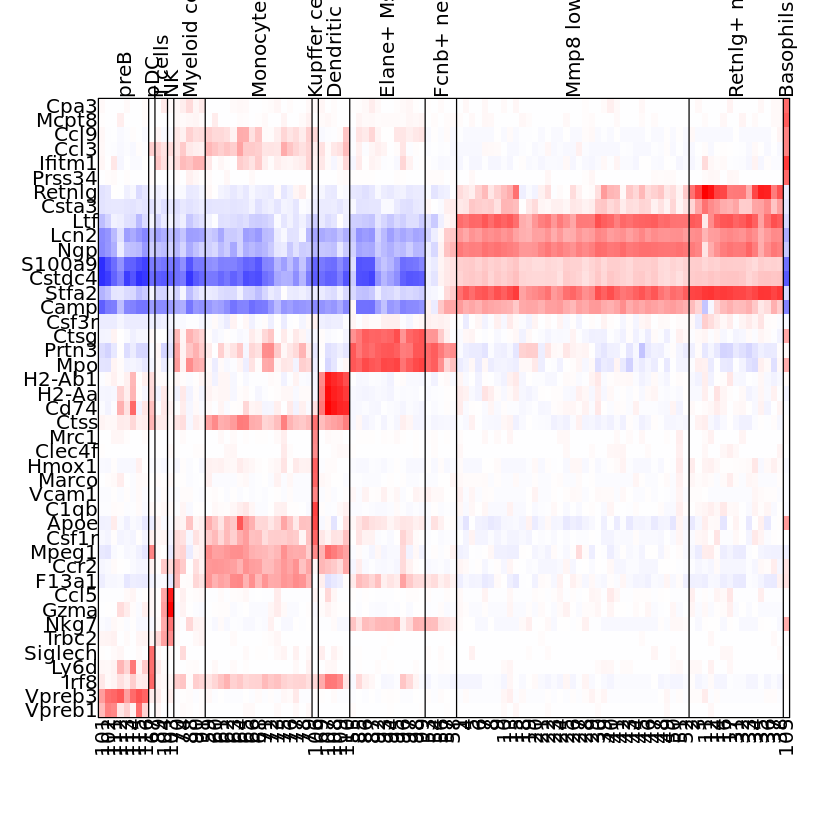

In [80]:
a_nms = rev(read.table(paste0(outdir, "/im_genes.txt"), h=T, stringsAsFactors = F)[[1]])
IM = a_lfp[intersect(a_nms, rownames(a_lfp)),]
IM = IM[, order(mc2lin[ colnames(IM)])]
image.2(IM, b=T, vct = factor(mc2lin[ colnames(IM)], levels = im_pops)); box()

In [81]:
summarize.table(table(sin_names, sin_stats$Cell_type))

,CD150,CD45-,CD45+,total
Basophils,0,0,74,74
Dendritic cells,0,0,314,314
Elane+ Ms4a3+ immature neutrophils,3,1,708,712
Endothelial cells,1612,342,9,1963
Erythrocytes,127,430,33,590
Erythroid cells,355,911,9,1275
Erythroid progenitors,2658,227,46,2931
Fcnb+ neutrophils,3,0,380,383
Hepatic stellate cells,77,4,0,81
Kupffer cells,8,0,66,74


In [82]:
genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

In [83]:
head(sort(lfp[,"104"], T), 40)

S100a9   S100a8     Cd52    Stfa1   Tmsb10   Coro1a   Cstdc5   Tyrobp 
4.208569 3.585073 3.556351 3.298360 3.210246 2.673801 2.656527 2.628910 
    Lsp1      Ngp     Gzma     Lcp1 AW112010    Trbc2     Rac2   Gimap4 
2.628308 2.619160 2.596397 2.569249 2.564294 2.393114 2.392339 2.306704 
    Ccl5    Il2rb     Ly6e     Nkg7      Id2   S100a4    Stfa3      Cd7 
2.292038 2.281242 2.274106 2.270032 2.265698 2.191719 2.172500 2.154963 
  S100a6   Cstdc4     Camp    Crip1  Stfa2l1   Tmsb4x   Fcer1g    Trbc1 
2.074975 2.038129 1.980488 1.933266 1.904156 1.874603 1.861618 1.855244 
   Klrd1    Psmb8     Lcn2    Anxa6      B2m     Ctsw     Lyz2    Ptprc 
1.791816 1.763500 1.759006 1.752636 1.715210 1.700370 1.694409 1.653226

In [84]:
IM = foc[a_nms, sample(im_cells)]
vct = factor(sin_names[ colnames(IM)], levels = im_pops); names(vct) = colnames(IM)
IM = IM[, order(vct)]

pdf(paste0(outdir, "/FigS1A.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows"); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

zlim: 0<>7.31899853319997



pdf 
  2

In [85]:
png(paste0(outdir, "/FigS1A.png"), height = 1000, width = 1000)
par(mar = rep(0,4))
image.2(IM, col = genes_shades, annotate = "none"); 
dev.off()

IM_empty = IM
IM_empty[!is.na(IM_empty)] = NA
pdf(paste0(outdir, "/FigS1A_reduced.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM_empty, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", zlim = c(0,1)); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

zlim: 0<>7.31899853319997



pdf 
  2

zlim: 0<>1



pdf 
  2

In [ ]:
id_b = paste0(id_s, "_b")
b_nms = choose_genes_from_clust(id_b, id, 
        nms_per_clust = 3, nms_thresh = 3, 
        ord = "max.col", bad_genes = bad_genes,
        must_haves = c("Gata2", "Car1", "Klf1", "Cd34", "Ifitm1", "Cdh5", "Kdr", "Cxcl12", "Upk3b", "Msln", "Igfbp5"))
length(b_nms)
#

In [ ]:
b_lfp = log2(scdb_mc(id_b)@mc_fp)
colnames(b_lfp) = ni_mc
IM = b_lfp[b_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
b_nms = rownames(IM)
#write.table(rev(b_nms), quote=F, row.names = F, file = paste0(outdir, "/ni_genes.txt"))

In [ ]:
b_nms = rev(read.table(paste0(outdir, "/ni_genes.txt"), h=T, stringsAsFactors = F)[[1]])
IM = b_lfp[b_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
image.2(IM, b=T, vct = factor(mc2lin[ colnames(IM)], levels = ni_pops)); box()

invisible(plot_two_genes_fp(id_s, "Col1a1", "Dcn"))
#invisible(plot_two_mc_fp(id_s, "174", "173"))

In [ ]:
IM = foc[b_nms, ni_cells]
#vct = factor(sin_cl@mc[ colnames(IM)], levels = names(sort(mc2lin[ ni_mc)])); names(vct) = colnames(IM)
vct = factor(sin_names[ colnames(IM)], levels = ni_pops); names(vct) = colnames(IM)
IM = IM[, order(vct)]

pdf(paste0(outdir, "/FigS1B.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows"); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
png(paste0(outdir, "/FigS1B.png"), height = 1000, width = 1000)
par(mar = rep(0,4))
image.2(IM, col = genes_shades, annotate = "none"); 
dev.off()

IM_empty = IM
IM_empty[!is.na(IM_empty)] = NA
pdf(paste0(outdir, "/FigS1B_reduced.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM_empty, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", zlim = c(0,1)); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
new_id = "hemato_clodronate_all"
new_mat = scdb_mat(new_id)
new_stats = new_mat@cell_metadata
dim(new_stats)

In [ ]:
new_cells = rownames(new_stats)[ new_stats$umicount >= 350 & new_stats$mt_frac < 0.25]
length(new_cells)

In [ ]:
head(new_stats)
table(new_stats[ new_cells, "Tissue"])

In [ ]:
new_umis = read_large_umis(new_id, cells = new_cells)
dim(new_umis)

In [ ]:
markers = names(scdb_gset(id)@gene_set)
length(markers)

In [ ]:
shared_genes = intersect(rownames(sin_umis), rownames(new_umis))
length(shared_genes)

both_umis = cbind(sin_umis[ shared_genes,], new_umis[ shared_genes,])

In [ ]:
venn(good_cells, colnames(both_umis))
venn(markers, rownames(both_umis))

In [ ]:
clusts = proj_sc_on_clusts(umis = both_umis, new_cells = new_cells, old_cells = good_cells, clusts = sin_cl@mc[ good_cells], 
                           markers = intersect(shared_genes, markers))
table(clusts)

In [ ]:
new_dist = table(new_stats[ new_cells, "Tissue"],
                 factor(color2name[ sin_cl@colors[ clusts]], levels = lin_ord))
new_dist

In [ ]:
new_n = new_dist / rowSums(new_dist)
barplot(t(new_n), col = name2color[ colnames(new_n)], axes = F)
axis(2, las = 2)
par(mar = c(10,10,0,0))
image.2(new_n, col = colorRampPalette(c("white", "red"))(1000)); box()

## Bone analysis

In [ ]:
id = "hemato_bone"

In [ ]:
id_s = paste0(id, "_annotated")
#message("Loaded a UMI matrix of ", sc_mat@ncells, " cells and ", sc_mat@ngenes, " genes.")

message("Loading singlets dataset:")
sin_2d = scdb_mc2d(id); sin_cl = scdb_mc(id_s); sin_mat = scdb_mat(id)
lfp = log2(sin_cl@mc_fp)
message("Loaded a metacell object of ", length(sin_cl@mc), " singlets. Total of ", length(table(sin_cl@mc)), " metacells.")


In [ ]:
message("mc contains the assignment of cell to metacell")
head(sin_cl@mc)

message("colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state")
head(sin_cl@colors)

message("color_key maps each color to its annotation")
head(sin_cl@color_key)

message("It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color")
color_scheme = sin_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group

message("Now we can assign each cell with its annotation")
sin_names = color2name[ sin_cl@colors[ sin_cl@mc]]; names(sin_names) = names(sin_cl@mc)

as.matrix(table(sin_names))


In [ ]:
message("In addition, metadata per cell can be extracted from the mat object")
sin_stats = sin_mat@cell_metadata[names(sin_cl@mc),]
sin_stats[ sample(rownames(sin_stats), 5),]

In [ ]:
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

In [ ]:
mc2lin = factor(color2name[ sin_cl@colors], levels = lin_ord); 
names(mc2lin) = seq_along(mc2lin)
mc_ord = order(mc2lin)

lfp = log2(sin_cl@mc_fp)
nms = choose_genes_from_clust(mc_id = id_s,      # the unique id of the mc object
                              mat_id = id_s,     # the unique id of the mat object
                              nms_per_clust = 2, # number of differential genes per metacell
                              nms_thresh = 2)  # minimum threshold for gene enrichment

IM = lfp[ nms, mc_ord]
IM = IM[ order(max.col(IM)),]

image.2(IM, balance=T, vct = mc2lin[ colnames(IM)])
box()

In [ ]:
table(sin_names)
bad_pops = "Mix"
good_pops = setdiff(lin_ord, bad_pops)
good_cells = names(sin_names)[ sin_names %in% good_pops]

In [ ]:
pdf(paste0(outdir, "/Fig1E.pdf"), useDingbats = F)
plot.2(sin_2d@sc_x[ good_cells], sin_2d@sc_y[ good_cells], col = sin_cl@colors[ sin_cl@mc[ good_cells]])
dev.off()

pdf(paste0(outdir, "/Fig1E_legend.pdf"), useDingbats = F)
plot.empty()
legend("topleft", good_pops, pch = 20, pt.cex = 2, col = name2color[ good_pops])
dev.off()


In [ ]:
comb = paste0(sin_stats$Cell_type, "@", sin_stats$Age)
comb = gsub("\\+", "", comb)
names(comb) = rownames(sin_stats)
sample_dist = table(comb[ good_cells], factor(sin_names[ good_cells], levels = good_pops))
dist_n = sample_dist / rowSums(sample_dist)

l = names(table(sin_stats[ good_cells, "Cell_type"]))
for (c in setdiff(l, "CD150")) {
    pdf(paste0(outdir, "/bone_sample_dist_", c, ".pdf"), height = 5, width = 4)
    X = dist_n[ grep(paste0(c, "@"), rownames(dist_n)),]
    rownames(X) = vecsplit(rownames(X), "@", 2)
    barplot(t(X) * 100, col = name2color[ colnames(sample_dist)], main = c, axes = F)
    axis(2, las = 2)
    dev.off()
}

In [ ]:
c = "CD150"
pdf(paste0(outdir, "/bone_sample_dist_", c, ".pdf"), height = 5, width = 2)
X = dist_n[ grep(paste0(c, "@"), rownames(dist_n)),]
barplot(matrix(X) * 100, col = name2color[ colnames(sample_dist)], main = c, axes = F)
axis(2, las = 2)
dev.off()


In [ ]:
table(comb)

In [ ]:
X

In [ ]:
im_cells = names(scdb_mc(paste0(id, "_a"))@mc)
ni_cells = names(scdb_mc(paste0(id, "_b"))@mc)
length(im_cells)
length(ni_cells)

im_mc = names(table(sin_cl@mc[ im_cells]))
ni_mc = names(table(sin_cl@mc[ ni_cells]))

im_pops = intersect(good_pops, names(table(sin_names[ im_cells])))
ni_pops = intersect(good_pops, names(table(sin_names[ ni_cells])))

In [ ]:
sin_umis = read_large_umis(id, cells = good_cells)
sin_n = sweep(sin_umis, 2, colSums(sin_umis), "/") * 1000
foc = log(1 + 7 * sin_n)

In [ ]:
bad_genes = grep("Gm[0-9].|Mir|-ps|Rpl|Rps|Ig|Jchain|Ftl1|Malat1", sin_mat@genes, v=T)


In [ ]:
id_a = paste0(id, "_a")
a_nms = choose_genes_from_clust(id_a, id, 
        nms_per_clust = 3, nms_thresh = 3, 
        ord = "max.col", bad_genes = bad_genes,
        must_haves = c("Vpreb1", "Trbc2", "Cd3e", "Ccr2", "Mcpt4"))
length(a_nms)
#

In [ ]:
a_lfp = log2(scdb_mc(id_a)@mc_fp)
colnames(a_lfp) = im_mc
IM = a_lfp[a_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
a_nms = rownames(IM)
#write.table(rev(a_nms), quote=F, row.names = F, file = paste0(outdir, "/bone_im_genes.txt"))

In [ ]:
a_nms = rev(read.table(paste0(outdir, "/bone_im_genes.txt"), h=T, stringsAsFactors = F)[[1]])
IM = a_lfp[a_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
image.2(IM, b=T, vct = factor(mc2lin[ colnames(IM)], levels = im_pops)); box()

In [ ]:
genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

In [ ]:
IM = foc[a_nms, im_cells]
vct = factor(sin_names[ colnames(IM)], levels = im_pops); names(vct) = colnames(IM)
IM = IM[, order(vct)]

pdf(paste0(outdir, "/FigS1C.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows"); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
png(paste0(outdir, "/FigS1C.png"), height = 1000, width = 1000)
par(mar = rep(0,4))
image.2(IM, col = genes_shades, annotate = "none"); 
dev.off()

IM_empty = IM
IM_empty[!is.na(IM_empty)] = NA
pdf(paste0(outdir, "/FigS1C_reduced.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM_empty, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", zlim = c(0,1)); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
which(color2name[ sin_cl@colors] == "NK/T")

In [ ]:
head(sort(lfp[,44],T),20)

In [ ]:
id_b = paste0(id, "_b")
b_nms = choose_genes_from_clust(id_b, id, 
        nms_per_clust = 3, nms_thresh = 3, 
        ord = "max.col", bad_genes = bad_genes,
        must_haves = c("Gata2", "Car1", "Klf1", "Cd34", "Ifitm1", "Cdh5", "Kdr", "Cxcl12", "Hlf"))
length(b_nms)
#

In [ ]:
b_lfp = log2(scdb_mc(id_b)@mc_fp)
colnames(b_lfp) = ni_mc
IM = b_lfp[b_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
b_nms = rownames(IM)
#write.table(rev(b_nms), quote=F, row.names = F, file = paste0(outdir, "/bone_ni_genes.txt"))

In [ ]:
b_nms = rev(read.table(paste0(outdir, "/bone_ni_genes.txt"), h=T, stringsAsFactors = F)[[1]])
IM = b_lfp[b_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
image.2(IM, b=T, vct = factor(mc2lin[ colnames(IM)], levels = ni_pops)); box()

invisible(plot_two_genes_fp(id_s, "Col1a1", "Dcn"))
#invisible(plot_two_mc_fp(id_s, "174", "173"))

In [ ]:
IM = foc[b_nms, ni_cells]
#vct = factor(sin_cl@mc[ colnames(IM)], levels = names(sort(mc2lin[ ni_mc)])); names(vct) = colnames(IM)
vct = factor(sin_names[ colnames(IM)], levels = ni_pops); names(vct) = colnames(IM)
IM = IM[, order(vct)]

pdf(paste0(outdir, "/FigS1D.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows"); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
png(paste0(outdir, "/FigS1D.png"), height = 1000, width = 1000)
par(mar = rep(0,4))
image.2(IM, col = genes_shades, annotate = "none"); 
dev.off()

IM_empty = IM
IM_empty[!is.na(IM_empty)] = NA
pdf(paste0(outdir, "/FigS1D_reduced.pdf"), height = 5, width = 8)
par(mar = c(0.5,7,0,0), fig = c(0,0.9,0.1,1))
image.2(IM_empty, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", zlim = c(0,1)); box()
par(mar = c(0,7,0,0), fig = c(0,0.9,0,0.1), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = sin_cl@colors[ sin_cl@mc[ colnames(IM)]]); box()
par(mar = c(0.5,3,0,0), fig = c(0.9,1,0.1,0.3), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(ax), axes = F, col = genes_shades); box()
axis(2, las = 2)
dev.off()

In [ ]:
shared = intersect(names(sin_names), colnames(sin_n))

y = sort(tapply(sin_n["Il1b", shared], sin_names[ shared], mean))
pdf(paste0(outdir, "/Il1b_expression_bones.pdf"), height = 5, width = 7)
barplot(y, las = 2, col = name2color[ names(y)], main = "Il1b")
dev.off()

In [ ]:
setdiff(lin_ord, names(y))

In [ ]:
quantile(colSums(sin_umis))